# Linear Regression in tensorflow

## 1.1  Linear Regression with multiple variable (multiple/multivariable linear regression)

<img src="mult_lin_reg_2.PNG">

#### when there are more than one independent variables. It is called a multivariate linear regression

#### problem Statement - To predict the price of a house given there size(in square feet) and number of bedrooms

In [2]:
import os  
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import tensorflow as tf

In [3]:
tf.__version__

'1.4.0'

### Load the data file

In [4]:
path = os.getcwd() + '\ex1data2.txt'  
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])  
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


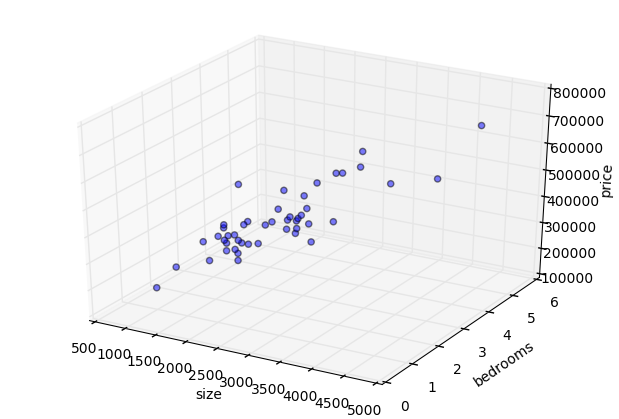

In [6]:
fig = plt.figure()
ax=Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Size'],data2['Bedrooms'],data2['Price'],c='blue',marker='o',alpha=0.5)
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()

####  feature normalization -  we need to adjust the scale of the features. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation. Fortunately this is one line of code using pandas.

In [7]:
mean = data2.mean()
std = data2.std()
data_norm = (data2 - mean) / std  
data_norm.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [8]:
data_norm.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16,-8.031401e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


### Input and output data

In [9]:
feature_names = ["Size", "Bedrooms"]
#data_x = data2.loc[:,columns]
data_x=data_norm[feature_names]
data_y = data_norm["Price"]
print ('input_shape: ', data_x.shape)
print ('output_shape: ', data_y.shape)
data_x1 = data_norm["Size"]
data_x2 = data_norm["Bedrooms"]
print ('single_input_shape: ', data_x1.shape)

input_shape:  (47, 2)
output_shape:  (47,)
single_input_shape:  (47,)


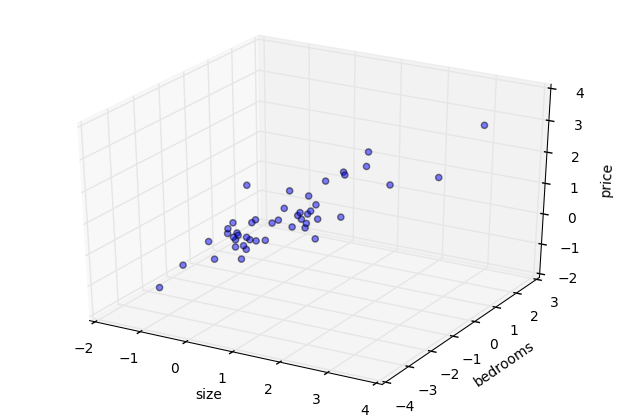

In [10]:
fig = plt.figure()
ax=Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x1,data_x2,data_y,c='blue',marker='o',alpha=0.5)
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()

### For two features

###     linear reg model, a = w1.x1 + w2.x2 + b

#### create placeholders for input X1,X2 (size,bedrooms) and label Y (price)

In [11]:
with tf.name_scope('inputs'):
    X1 = tf.placeholder(tf.float32 , name = "input1")
    X2 = tf.placeholder(tf.float32 , name = "input2")
    Y = tf.placeholder(tf.float32 , name = "output")

#### Create weights and bias variable initialized to 0

In [12]:
with tf.name_scope('parameters'):
    w1 = tf.Variable(0.0,name='weights_1')
    w2 = tf.Variable(0.0,name='weights_2')
    #w3 = tf.Variable(0.0,name='weights_3')
    b = tf.Variable(0.0,name='bias')

#### Define the linear regression model to predict the price based on size and num of bedroom 
 y_predicted = X1.w1 + X2.w2 + b
         
         or
         
 Y_predicted=tf.add(tf.multiply(X1, w1),tf.multiply(X2, w2), b)

In [13]:
with tf.name_scope('regression_model'):
    Y_predicted = X1*w1 + X2*w2 + b
    #Y_predicted=tf.add(tf.multiply(X1, w1),tf.multiply(X2, w2), b)

#### Define the square error function as loss function to monitor the performance of model as well as for gradient descent

In [14]:
with tf.name_scope('loss_function'):
    loss = tf.reduce_mean(tf.square(Y-Y_predicted,name = 'loss'))

#### Define a gradient descent optimizer for optimizing the weights and biases of the model

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

#### creating summary for writing loss function in event file

In [16]:
# Add summary ops to collect data
W1_hist = tf.summary.histogram("weights_1", w1)
W2_hist = tf.summary.histogram("weights_2", w2)
b_hist = tf.summary.histogram("biases", b)
y_hist = tf.summary.histogram("y_predicted", Y_predicted)
cost = tf.summary.scalar('loss',loss)
# merge all the summaries
merged_summaries = tf.summary.merge_all()

### Saving the trained model using saver op

In [17]:
# Create a Saver object
saver = tf.train.Saver()

### Training the model by launching it through a session

In [18]:
cost_history = np.empty(shape=[1],dtype=float)
with tf.Session() as sess:
    # create a summary writer
    summary_writer = tf.summary.FileWriter('./mult_lin_reg_summary',sess.graph)
    # initialize the defined w and b variables
    sess.run(tf.global_variables_initializer())
    
    # Train the model
    for i in range(300): # train the model for 100 iterations
        # for every iteration all the data is passed
        for x1,x2,y in zip(data_x1,data_x2,data_y):
            # run the trining function to minimize the loss using 
            #defined optimizer
            _,loss_v,summary=sess.run([train_op,loss,merged_summaries],feed_dict={X1:x1,X2:x2,Y:y})
            # for feeding the entire dataset at once into the feed dict
            #_,loss_v,summary=sess.run([train_op,loss,merged_summaries],feed_dict={X1:data_x1,X2:data_x2,Y:data_y})
        cost_history=np.append(cost_history,loss_v)
            #summary_writer.add_summary(summary,i)
        # output the weight and bias value after every iteration
        if i%20==0:
            print ('loss is: ',loss_v)
            summary_writer.add_summary(summary,i)
    w1_value,w2_value,b_value = sess.run([w1,w2,b])
        #print (w_value,b_value)
        # print the loss function after every iteration
        #loss_value = sess.run(loss)
    saver.save(sess, '.\saved_model_mult\model_final_mult_lin_reg')
summary_writer.close()

loss is:  0.528928
loss is:  0.013236
loss is:  2.33226e-05
loss is:  0.00123012
loss is:  0.00273157
loss is:  0.00358308
loss is:  0.00399733
loss is:  0.00418826
loss is:  0.00427435
loss is:  0.0043129
loss is:  0.00432985
loss is:  0.00433753
loss is:  0.00434078
loss is:  0.00434237
loss is:  0.00434314


### final trained parameters

In [19]:
print('w1: ',w1_value)
print('w2: ',w2_value)
print('b: ',b_value)

w1:  0.880155
w2:  -0.0552883
b:  -0.00159066


### Plot the cost function 

301


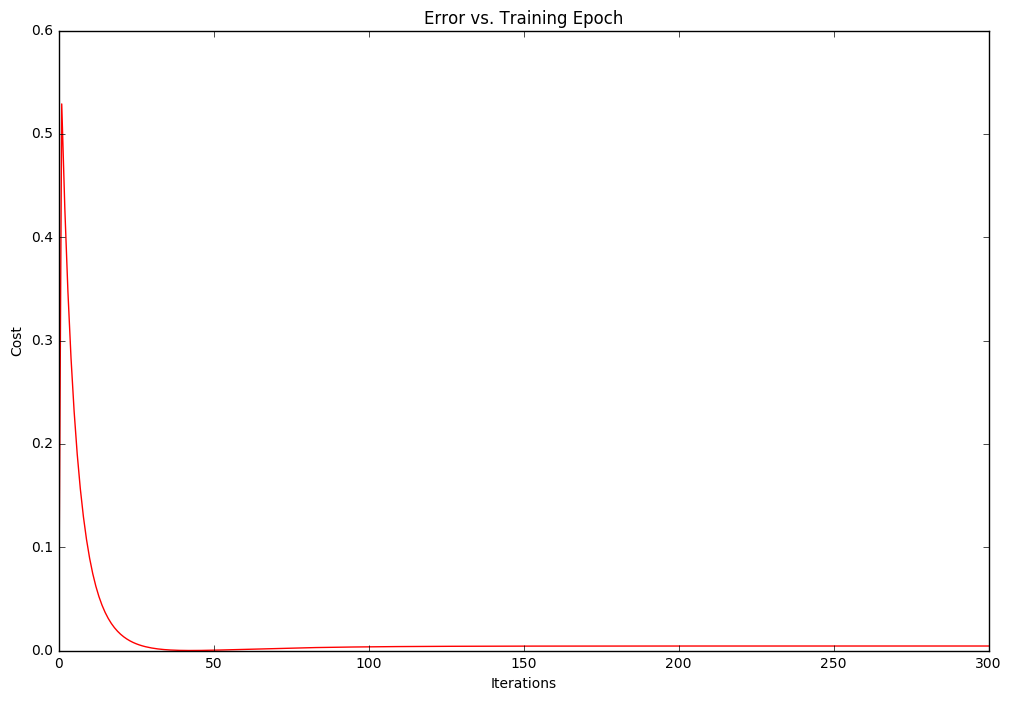

In [20]:
len = cost_history.shape[0]
print (len)
iters = len
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost_history, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

In [21]:
x1_test = np.array(data_x1[0:5])
x2_test = np.array(data_x2[0:5])
y_test = np.array(data_y[0:5])
y_test_predicted=x1_test*w1_value+x2_test*w2_value+b_value
print ('predicted_value: ', y_test_predicted)
print ('true_value: ', y_test)

predicted_value:  [ 0.12520478 -0.4329892   0.453033   -0.5641204   1.04489573]
true_value:  [ 0.47574687 -0.08407444  0.22862575 -0.86702453  1.59538948]


In [22]:
x1_test = np.array(data_x1)
x2_test = np.array(data_x2)
y_test = np.array(data_y)
y_test_predicted=x1_test*w1_value+x2_test*w2_value+b_value
print (x1_test.shape,y_test.shape,y_test_predicted.shape)

(47,) (47,) (47,)


In [23]:
#plt.plot(x2_test,y_test,'o', x2_test,y_test_predicted,"-")
#plt.xlabel("num of bedrooms")
#plt.ylabel("price $")
#plt.legend(['data_X2:#bedrooms', 'Regression Model(a=w1*x1+w2*x2+b)'],bbox_to_anchor=(1, 1),loc=4)
#plt.show()

### Plot the trained multiple linear regression model

(100, 100)


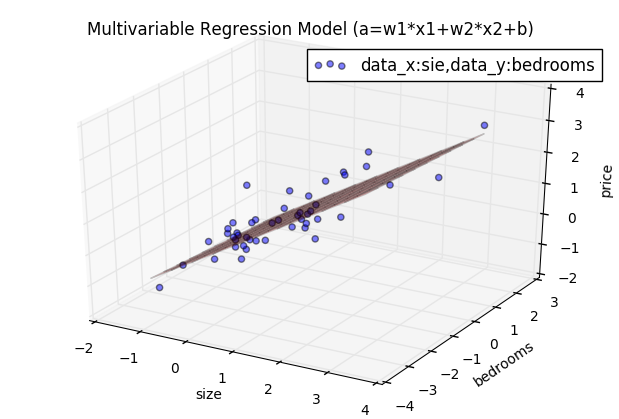

In [24]:

x1_surf,x2_surf= np.meshgrid(np.linspace(data_x1.min(),data_x1.max(),100),np.linspace(data_x2.min(),data_x2.max(),100))
#y_test_predicted_ = np.meshgrid(np.linspace(y_test_predicted.min(),y_test_predicted.max(),100))
Y_predicted_surf = x1_surf*w1_value+x2_surf*w2_value+b_value
print (Y_predicted_surf.shape)
#fittedY.reshape(x_surf.shape)
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax=Axes3D(fig)
sct = ax.scatter(data_x1,data_x2,data_y,c='blue', marker='o',alpha=0.5)
plt_surf = ax.plot_surface(x1_surf,x2_surf,Y_predicted_surf,color='red',alpha = 0.2)
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.title('Multivariable Regression Model (a=w1*x1+w2*x2+b)')
plt.legend(['data_x:sie,data_y:bedrooms'],bbox_to_anchor=(1, 0.8),loc=4)
plt.show()

### using the saved model

In [25]:
tf.reset_default_graph()  
with tf.Session() as sess:  
    imported_meta = tf.train.import_meta_graph("./saved_model_mult/model_final_mult_lin_reg.meta")
    imported_meta.restore(sess, tf.train.latest_checkpoint('./saved_model_mult/'))
    w1_final = sess.run(('parameters/weights_1:0'))
    w2_final = sess.run(('parameters/weights_2:0'))
    b_final = sess.run(('parameters/bias:0'))
    print("wieight1 final: {}".format (w1_final))
    print("wieight2 final: {}".format (w2_final))
    print("bias final: {}".format (b_final))

INFO:tensorflow:Restoring parameters from ./saved_model_mult/model_final_mult_lin_reg
wieight1 final: 0.8801549077033997
wieight2 final: -0.05528831109404564
bias final: -0.0015906643820926547
